## MLP with TensorFlow 2.0
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [1]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

2023-04-06 18:29:54.046919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 18:29:54.268081: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 18:29:54.269371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 18:29:55.249938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


MNIST data set ready. N=60000, D=784, n_classes=10


In [2]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes

    return data_shuffle, labels_shuffle

In [4]:
##################
# Training phase #
##################

E = 50                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(x, y, alpha):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    h = tf.nn.relu(tf.matmul(x, w1) + b1)  # output of first layer after ReLu activation
    y_pred = tf.nn.sigmoid(tf.matmul(h, w2) + b2) # output of second layer after sigmoid activation
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    diff = y_pred - y
    loss = tf.reduce_mean(tf.square(diff))
    # define the gradients
    grad_w1, grad_b1, grad_w2, grad_b2 =  tf.gradients(ys=loss, xs=[w1, b1, w2, b2])
    # compute the new values of the gradients with the assign method (see slides)
    w1.assign(w1 - alpha * grad_w1)
    b1.assign(b1 - alpha * grad_b1)
    w2.assign(w2 - alpha * grad_w2)
    b2.assign(b2 - alpha * grad_b2)
    return y_pred, loss

# Init the tf.Variablesw 1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev = 0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, n_classes), stddev = 0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[n_classes], dtype='float64'))

# Run the computational graph
J = [] # to store the evolution of loss J for each epoch
for epoch in range(E):
    J_epoch = 0.0
    for _ in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        x_train_batch, y_train_batch = next_batch(B, x_train, y_train)
        with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
            out = mlp_train(x_train_batch, y_train_batch, A)
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {}".format(epoch, J_epoch))

epoch = 0, loss = 58.64231472273458
epoch = 1, loss = 41.67887502238665
epoch = 2, loss = 39.081965981569844
epoch = 3, loss = 36.90061370169597
epoch = 4, loss = 34.96542616959415
epoch = 5, loss = 33.136729352088516
epoch = 6, loss = 31.418740955476583
epoch = 7, loss = 29.823219388586626
epoch = 8, loss = 28.59631071182218
epoch = 9, loss = 27.165810394682904
epoch = 10, loss = 26.124461224331046
epoch = 11, loss = 25.058146323621816
epoch = 12, loss = 24.094200523372596
epoch = 13, loss = 23.30828834862135
epoch = 14, loss = 22.62111297472997
epoch = 15, loss = 21.88691228561025
epoch = 16, loss = 21.23659777364404
epoch = 17, loss = 20.60964401648701
epoch = 18, loss = 19.985446552985398
epoch = 19, loss = 19.652857550651095
epoch = 20, loss = 19.07323464485052
epoch = 21, loss = 18.679740631611264
epoch = 22, loss = 18.414552721749597
epoch = 23, loss = 17.92366202587079
epoch = 24, loss = 17.58571805017423
epoch = 25, loss = 17.278713541874616
epoch = 26, loss = 16.9829889776955

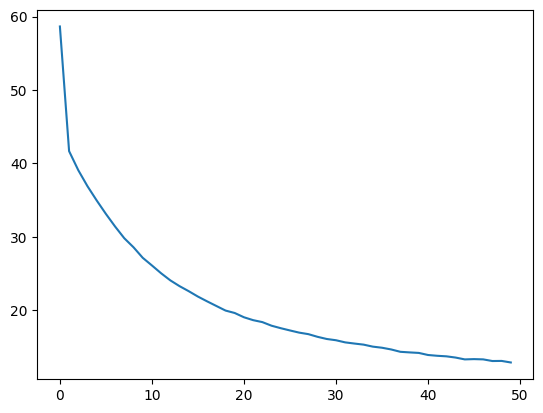

In [5]:
# Plot the evolution of the loss
plt.plot(J)

In [6]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(x, y):
    h = tf.nn.relu(tf.matmul(x, w1) + b1)
    y_pred = tf.matmul(h, w2) + b2
    return y_pred

# Run the computational graph
with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [7]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# samples  : ', N_test)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# samples  :  10000
# correct  :  8786
# missed   :  1214
accuracy   :  87.86 %
error rate :  12.14 %


In [8]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec), (x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')

##################
# Training phase #
##################

model = Sequential()
model.add(Dense(H, activation='relu', input_dim=784))
model.add(Dense(n_classes, activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=A), loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=E, verbose=1)

##################
# Testing phase  #
##################

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0947 - accuracy: 0.3253
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.5600
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.6874
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0525 - accuracy: 0.7395
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.7751
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0423 - accuracy: 0.8174
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.8408
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.8520
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0339 - accuracy: 0.8581
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.032